# Case Study 1 : Collecting Data from Twitter

Due Date: September 21, **BEFORE the beginning of class at 6:00pm**

## **NOTE: There are *always* last minute issues submitting the case studies.  DO NOT WAIT UNTIL THE LAST MINUTE!**

* ------------

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/9/9f/Twitter_bird_logo_2012.svg/220px-Twitter_bird_logo_2012.svg.png">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Tingting Ma
    
    Jiani Gao
    
    Jinyan Lyu
    
    Tianhao Guo
    
    Mo Cheng
    

**Required Readings:** 
* Chapter 1 and Chapter 9 of the book [Mining the Social Web](http://www.learndatasci.com/wp-content/uploads/2015/08/Mining-the-Social-Web-2nd-Edition.pdf) 
* The codes for [Chapter 1](http://bit.ly/1qCtMrr) and [Chapter 9](http://bit.ly/1u7eP33)


** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1: Sampling Twitter Data with Streaming API about a certain topic

* Select a topic that you are interested in, for example, "WPI" or "Lady Gaga"
* Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [2]:
import twitter
import json


# ---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information
    # on Twitter's OAuth implementation.

    CONSUMER_KEY = 'PoOx77O7x6QGWSZJUyPdXK9ci'
    CONSUMER_SECRET = 'ao8VoGR1WwOkjU7ASXQBfTD8IFL9P50R6CzlCW0tFqc1Vx6ifl'
    OAUTH_TOKEN = '354812054-MNiHp7kIJj8gMX1qKkWR7rd5VogbzIPNiGRQW1uD'
    OAUTH_TOKEN_SECRET = '1WbpfZfexiwxHMt804MQI98iBpYeBrCKaiIAXjlBvpZmH'

    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)

    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

def load_json(filename):
    f = open(filename, 'r', encoding = 'utf-8').read()
    content = json.loads(f)
    return content

def save_json(filename, data):
    with open(filename, 'w', encoding = 'utf-8') as f:
        f.write(json.dumps(data, indent = 3))

auth = oauth_login().auth
print(auth)

In [6]:
# ----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

def tweet_stream(q, max):
    # open a json file to save tweets
    file = open('problem1.json', 'w')
    twitter_stream = twitter.TwitterStream(auth=auth)
    # use the twitter stream api
    iterator = twitter_stream.statuses.filter(track=q)
    count = 0
    file.write('[ \n')
    for tweet in iterator:
        # check the number of tweets
        if count >= max:
            break
        file.write(json.dumps(tweet, indent=1))
        if count < max-1:
            file.write(', \n')
        count += 1
    # write data to file
    file.write(']')
    file.close()
    with open('problem1.json', 'r') as f:
        d = json.loads(f.read())
        print('Number of collected tweets: %d' % len(d))


tweet_stream('iphone8, iphone x', 10000)

Number of collected tweets: 10000


### Report some statistics about the tweets you collected 

* The topic of interest: iPhone 8, iPhone X


* The total number of tweets collected:  10000

*-----------------------

# Problem 2: Analyzing Tweets and Tweet Entities with Frequency Analysis

**1. Word Count:** 
* Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 words with their counts

In [9]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

from prettytable import PrettyTable
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

stop_words = stopwords.words('english') + list(string.punctuation) + ['https', 'http', "''", '``', "'s", "...", "n't", "rt"]
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

def count_words(data):
    words_count = {}
    for tweet in data:
        if "text" in tweet.keys() and tweet['lang']=='en':
            sentences = tweet['text']
            no_emoji_sentences = emoji_pattern.sub(r'', sentences)
            words = word_tokenize(no_emoji_sentences)
            for word in words:
                if (word.lower() not in stop_words) and (not word.startswith("//")) and (not word.startswith("'")):
                    words_count[word] = words_count.get(word, 0) + 1
    return words_count

all_tweets = load_json('problem1.json')
count = count_words(all_tweets)
sorted_count = sorted(count.items(), key=lambda d:d[1], reverse=True)

frequency_pt = PrettyTable(field_names = ['word', 'frequency'])
[frequency_pt.add_row(kv) for kv in sorted_count[:30]]
print(frequency_pt)







+-----------------+-----------+
|       word      | frequency |
+-----------------+-----------+
|      iPhone     |    6821   |
|        X        |    3405   |
|      Y'ALL      |    955    |
|        8        |    710    |
|      unlock     |    546    |
|      Apple      |    492    |
|        x        |    489    |
|       FUCK      |    478    |
|        GO       |    478    |
| antoniodelotero |    477    |
|        OK       |    477    |
|     TWEETING    |    477    |
|     PROFILE     |    477    |
|       SAYS      |    477    |
|     TWEETED     |    477    |
|       YET       |    477    |
|       face      |    474    |
|      iphone     |    439    |
|       new       |    411    |
|      people     |    397    |
|        gt       |    360    |
|       skip      |    335    |
|      quick      |    334    |
|     snapchat    |    334    |
|     stories     |    333    |
|  Bluntsandfood  |    326    |
|        7        |    305    |
|      facial     |    302    |
|       

**2. Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.


In [10]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

def count_sort_retweets(statuses):
    retweets_count = {}
    for tweet in statuses:
        if 'retweeted_status' in tweet.keys() and 'retweet_count' in tweet["retweeted_status"].keys():
            if tweet['text'] not in retweets_count.values():
                retweets_count[tweet['retweeted_status']['retweet_count']] = tweet['text']
    sorted_retweets_count = sorted(retweets_count.items(), key=lambda d:d[0], reverse=True)
    return sorted_retweets_count

tweets_data = load_json('problem1.json')
retweets_count = count_sort_retweets(tweets_data)

retweet_pt = PrettyTable(field_names = ['Retweet Number', 'Text'])
[retweet_pt.add_row(kv) for kv in retweets_count[:10]]
retweet_pt.max_width = 80
print(retweet_pt)

+----------------+----------------------------------------------------------------------------------+
| Retweet Number |                                       Text                                       |
+----------------+----------------------------------------------------------------------------------+
|     137690     |          RT @brendonSkolat: Beyoncé: *uses iPhone X facial recognition*          |
|                |                                                                                  |
|                |                        iPhone X: https://t.co/8ao9moveCd                         |
|     89774      |                              RT @tobjizzled: iPhone                              |
|                |                                    iPhone 3G                                     |
|                |                                    iPhone 3GS                                    |
|                |                                     iPhone 4                   

**3. Find the most popular Tweet Entities in your collection of tweets**

Please plot a table of the top 10 hashtags, top 10 user mentions that are the most popular in your collection of tweets.

In [21]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


from prettytable import PrettyTable

def count_sort_hashtags_and_user_mentions(statuses):
    hashtags_count = {}
    user_mentions_count = {}
    for tweet in statuses:
        if 'entities' in tweet.keys() and len(tweet['entities']['hashtags']) != 0:
            for hashtag in tweet['entities']['hashtags']:
                hashtags_count[hashtag['text']] = hashtags_count.get(hashtag['text'], 0) + 1
        if 'entities' in tweet.keys() and len(tweet['entities']['user_mentions']) != 0:
            for user_mention in tweet['entities']['user_mentions']:
                user_mentions_count[user_mention['screen_name']] = user_mentions_count.get(user_mention['screen_name'], 0) + 1
                
    sorted_hashtags_count = sorted(hashtags_count.items(), key=lambda d:d[1], reverse=True)
    sorted_user_mentions_count = sorted(user_mentions_count.items(), key=lambda d:d[1], reverse=True)
    return sorted_hashtags_count, sorted_user_mentions_count

tweets_data = load_json('problem1.json')
hashtags_count, user_mentions_count = count_sort_hashtags_and_user_mentions(tweets_data)

hashtags_pt = PrettyTable(field_names = ['hashtag', 'frequency'])
[hashtags_pt.add_row(kv) for kv in hashtags_count[:10]]
user_mentions_pt = PrettyTable(field_names = ['user mentions', 'frequency'])
[user_mentions_pt.add_row(kv) for kv in user_mentions_count[:10]]

print(hashtags_pt)
print(user_mentions_pt)




+---------------------------+-----------+
|          hashtag          | frequency |
+---------------------------+-----------+
|          iPhone8          |    339    |
|          iPhoneX          |    185    |
|            blog           |    178    |
|      amazingarabella      |    178    |
|         AppleEvent        |     81    |
|           Apple           |     65    |
| StarMoviesSecretScreening |     62    |
|        TheBigSelfie       |     62    |
|          iPhone9          |     62    |
|          Concours         |     35    |
+---------------------------+-----------+
+-----------------+-----------+
|  user mentions  | frequency |
+-----------------+-----------+
| antoniodelotero |    477    |
|  Bluntsandfood  |    326    |
|     eimauro     |    273    |
|  emilyferguson_ |    208    |
|      Apple      |    196    |
|     juanbuis    |    192    |
|  holden_a_fork  |    191    |
|   PlNKllD1412   |    190    |
|   Arabelladaho  |    178    |
|     YouTube     |    159  

* ------------------------

# Problem 3: Getting "All" friends and "All" followers of a popular user in twitter


* choose a popular twitter user who has many followers, such as "ladygaga".
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [33]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


import twitter
import json
import os
import sys
import time
from urllib.error import URLError
from http.client import BadStatusLine


def make_twitter_request(twitter_api_func, max_errors=10, *args, **kw):
    def handle_twitter_http_error(e, wait_period=2, sleep_when_rate_limited=True):

        if wait_period > 3600:  # Seconds
            print >> sys.stderr, 'Too many retries. Quitting.'
            raise e

        if e.e.code == 401:
            print >> sys.stderr, 'Encountered 401 Error (Not Authorized)'
            return None
        elif e.e.code == 404:
            print >> sys.stderr, 'Encountered 404 Error (Not Found)'
            return None
        elif e.e.code == 429:
            print >> sys.stderr, 'Encountered 429 Error (Rate Limit Exceeded)'
            if sleep_when_rate_limited:
                print >> sys.stderr, "Retrying in 15 minutes...ZzZ..."
                sys.stderr.flush()
                time.sleep(60 * 15 + 5)
                print >> sys.stderr, '...ZzZ...Awake now and trying again.'
                return 2
            else:
                raise e  # Caller must handle the rate limiting issue
        elif e.e.code in (500, 502, 503, 504):
            print >> sys.stderr, 'Encountered %i Error. Retrying in %i seconds' % \
            (e.e.code, wait_period)
            time.sleep(wait_period)
            wait_period *= 1.5
            return wait_period
        else:
            raise e



    wait_period = 2
    error_count = 0
    while True:
        try:
            return twitter_api_func(*args, **kw)
        except twitter.api.TwitterHTTPError as e:
            error_count = 0
            wait_period = handle_twitter_http_error(e, wait_period)
            if wait_period is None:
                return
        except URLError as e:
            error_count += 1
            print >> sys.stderr, "URLError encountered. Continuing."
            if error_count > max_errors:
                print >> sys.stderr, "Too many consecutive errors...bailing out."
                raise
        except BadStatusLine as e:
            error_count += 1
            print >> sys.stderr, "BadStatusLine encountered. Continuing."
            if error_count > max_errors:
                print >> sys.stderr, "Too many consecutive errors...bailing out."
                raise

In [34]:
from functools import partial
from sys import maxsize


def get_friends_followers_ids(twitter_api, screen_name=None, user_id=None, friends_limit=maxsize,
                              followers_limit=maxsize):
    # Must have either screen_name or user_id (logical xor)
    assert (screen_name != None) != (user_id != None), \
        "Must have screen_name or user_id, but not both"

    get_friends_ids = partial(make_twitter_request, twitter_api.friends.ids, count=5000)
    get_followers_ids = partial(make_twitter_request, twitter_api.followers.ids, count=5000)

    friends_ids, followers_ids = [], []

    for twitter_api_func, limit, ids, label in [
        [get_friends_ids, friends_limit, friends_ids, "friends"],
        [get_followers_ids, followers_limit, followers_ids, "followers"]
    ]:

        if limit == 0: continue

        cursor = -1
        while cursor != 0:
            # Use make_twitter_request via the partially bound callable...
            if screen_name:
                response = twitter_api_func(screen_name=screen_name, cursor=cursor)
            else:  # user_id
                response = twitter_api_func(user_id=user_id, cursor=cursor)

            if response is not None:
                ids += response['ids']
                cursor = response['next_cursor']

            print('Fetched {0} total {1} ids for {2}'.format(len(ids), label, (user_id or screen_name)))

    return friends_ids[:friends_limit], followers_ids[:followers_limit]

In [45]:
import io

twitter_api = oauth_login()

friends_ids, followers_ids = get_friends_followers_ids(twitter_api,
                                                       screen_name="TransitoOK",
                                                       friends_limit=100,
                                                       followers_limit=100)

friend_list = []
for friend_id in friends_ids:
    friend_list += twitter_api.users.lookup(user_id=friend_id)
    
save_json("TransitoOK_friends_info.json", friend_list)

follower_list = []
for follower_id in followers_ids:
    follower_list += twitter_api.users.lookup(user_id=follower_id)

save_json("TransitoOK_followers_info.json", follower_list)
    

Fetched 1758 total friends ids for TransitoOK
Fetched 2165 total followers ids for TransitoOK


In [46]:
from prettytable import PrettyTable


# plot 20 followers and 20 friends
friends_info = load_json('TransitoOK_friends_info.json')
followers_info = load_json('TransitoOK_followers_info.json')

friends_ids_names = [(friend_info['id'], friend_info["screen_name"])
                       for friend_info in friends_info[:20]]
followers_ids_names = [(follower_info['id'], follower_info["screen_name"])
                       for follower_info in followers_info[:20]]

friends_pt = PrettyTable(field_names = ['friend_id', 'friend_screen_name'])
[friends_pt.add_row(kv) for kv in friends_ids_names]

followers_pt = PrettyTable(field_names = ['follower_id', 'follower_screen_name'])
[followers_pt.add_row(kv) for kv in followers_ids_names]
print(friends_pt)
print(followers_pt)

+--------------------+--------------------+
|     friend_id      | friend_screen_name |
+--------------------+--------------------+
|      32953007      |    gendarmeria     |
|     4224187773     |   gustavo_osman    |
|     220410227      |    Estacion905     |
|     256260076      |     acostamaxi     |
|     105932149      |    virginiaarce    |
|      90185866      |   marianoemartin   |
|     130866630      |    josedel_rio     |
| 780858179018035200 |    lanacionmas     |
|      34016889      |      Maikeme       |
|     180564455      |     Taxivista      |
|      59655672      |     bertellof      |
|      59655753      |       cgmira       |
|     190607660      |    EleonoraCole    |
|      75178495      |   pablitolescano   |
|      96187825      |    AdalRamones     |
|     149288563      |    segregustavo    |
|     116828061      |  pibesdesistemas   |
|      50126679      |   telefenoticias   |
|     4883842013     |  JuevesIntratabl   |
|     333573183      |     Julyw

* Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table

In [47]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
mutual_friends = []
for friend_info in friends_info:
    if friend_info['id'] in followers_ids:
        mutual_friends.append((friend_info['id'], friend_info['screen_name']))

mutual_pt = PrettyTable(field_names = ['mutual_friend_id', 'mutual_friend_screen_name'])
[mutual_pt.add_row(kv) for kv in mutual_friends] 
print(mutual_pt)







+--------------------+---------------------------+
|  mutual_friend_id  | mutual_friend_screen_name |
+--------------------+---------------------------+
|     220410227      |        Estacion905        |
|     256260076      |         acostamaxi        |
|     105932149      |        virginiaarce       |
|     180564455      |         Taxivista         |
|      59655753      |           cgmira          |
|     3330077703     |        am1300radio        |
|     221170428      |         soygabito         |
|     170159116      |      Julianvaccarini      |
|     514876685      |       marcelo_aiello      |
| 855017036208013314 |       CarlosSubosky       |
|      50765618      |        pablogaston        |
|     2306952265     |          nahdrian         |
|     208754920      |       pablocigliutti      |
|     1731098514     |         ciharispe         |
|     151197934      |        HernanRolon        |
|     1472641098     |        morenojuan95       |
| 896575289244954624 |      cri

*------------------------

# Problem 4: Business question 

Run some additional experiments with your data to gain familiarity with the twitter data and twitter API.

* Come up with a business question that Twitter data could help answer.
* Decribe the business case.
* How could Twitter data help a company decide how to spend its resources.

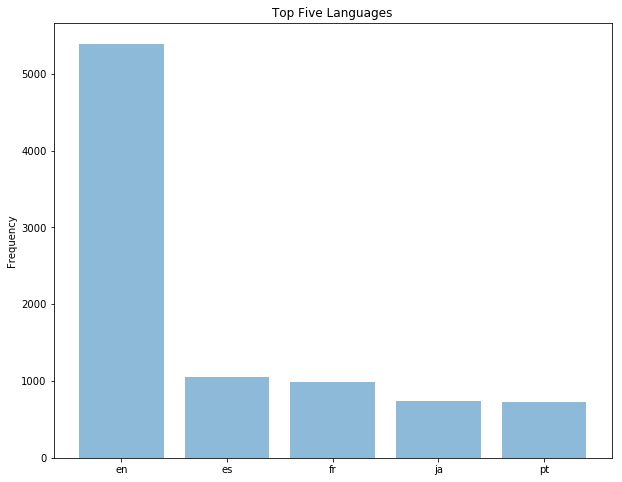

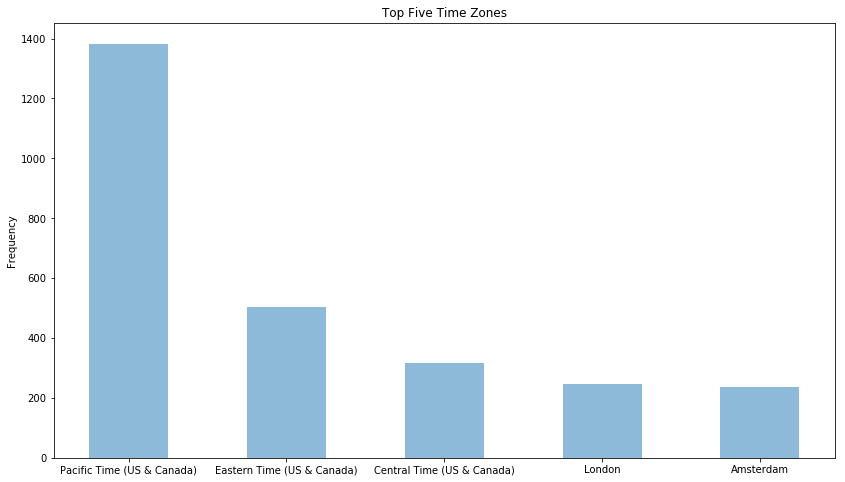

In [2]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import matplotlib.pyplot as plt
import json
from collections import Counter

#plot top five languages
collect = []

with open("problem1.json", 'r') as file:
    data = json.loads(file.read())
    for d in data:
        if "lang" in d:
            collect.append(d["lang"])

counter = Counter(collect)
zipped = list(zip(*counter.most_common()))
x = [i for i in range(len(zipped[0]))]
y = zipped[1]
my_xticks = zipped[0]
plt.figure(figsize=(10,8))
plt.xticks(x[:5], my_xticks[:5])
# plt.plot(x, y)
plt.bar(x[:5],y[:5],align='center', alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top Five Languages')
# plt.plot(zipped[0], zipped[1], 'ro')
plt.show()

#plot top five time zones
collect1 = []
with open("problem1.json", 'r') as file:
    data = json.loads(file.read())
    for d1 in data:
        if "user" in d1:
            user_data=d1["user"]
            if "time_zone" in user_data:
                if user_data["time_zone"] is not None:
                    collect1.append(user_data["time_zone"])
counter1 = Counter(collect1)
# print(collect1)
# print(counter1)
zipped1 = list(zip(*counter1.most_common()))
x1 = [i for i in range(len(zipped1[0]))]
y1 = zipped1[1]
my_xticks1 = zipped1[0]
plt.figure(figsize=(14,8))
plt.xticks(x1[:5], my_xticks1[:5])
# plt.plot(x, y)
plt.bar(x1[:5],y1[:5],width=0.5,align='center', alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top Five Time Zones')
# plt.plot(zipped[0], zipped[1], 'ro')
plt.show()



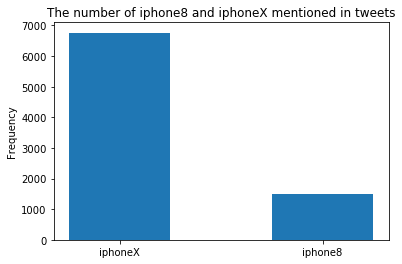

In [5]:
# Calculate the amount of the two different products mentioned in the collected tweets
import matplotlib.pyplot as plt
from collections import Counter

iphone_tweets_data = load_json('problem1.json')
count = []
for tweet in iphone_tweets_data:
    if "text" in tweet.keys():
            sentences = tweet['text']
            if "iphone 8" in sentences.lower() or "iphone8" in sentences.lower():
                count.append("iphone8")
            if "iphone x" in sentences.lower() or "iphonex" in sentences.lower():
                count.append("iphoneX")
counter = Counter(count)
#print(counter)
x, y = [], []
for key in counter.keys():
    x.append(key)
for value in counter.values():
    y.append(value)
plt.bar(range(len(y)), y, align='center', width=0.5)
plt.xticks(range(len(x)), x)
plt.ylabel("Frequency")
plt.title("The number of iphone8 and iphoneX mentioned in tweets")
plt.show()



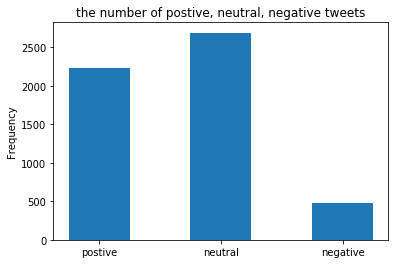

In [3]:
# Calculate the number of postive, neutral, negative tweets
from textblob import TextBlob
import matplotlib.pyplot as plt

tweets = load_json('problem1.json')
c = [0,0,0]
for tweet in tweets:
    if "text" in tweet.keys() and tweet['lang'] == 'en':
        text = tweet['text']
        text = text.lower()
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            c[0] += 1
        elif analysis.sentiment.polarity == 0:
            c[1] += 1
        elif analysis.sentiment.polarity < 0:
            c[2] += 1
x = ['postive', 'neutral', 'negative']
plt.bar(range(len(c)), c, align='center', width=0.5)
plt.xticks(range(len(x)), x)
plt.ylabel("Frequency")
plt.title("the number of postive, neutral, negative tweets")
plt.show()

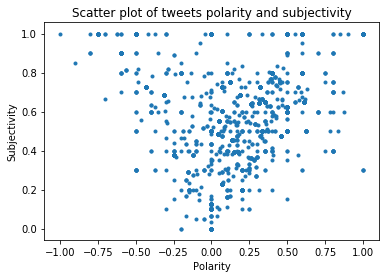

In [4]:
#The polarity score is a float within the range [-1.0, 1.0]. 
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
tweets = load_json('problem1.json')
x = []
y = []
for tweet in tweets:
    if "text" in tweet.keys() and tweet['lang'] == 'en':
        text = tweet['text']
        text = text.lower()
        analysis = TextBlob(text)
        p = analysis.sentiment.polarity
        s = analysis.sentiment.subjectivity
        x.append(p)
        y.append(s)
plt.scatter(x, y, marker='.')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.title("Scatter plot of tweets polarity and subjectivity")
plt.show()

[249, 253, 137]


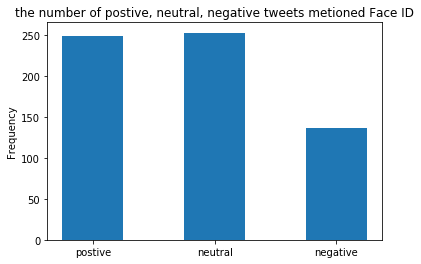

In [10]:
# Sentiment Analysis of tweets metioned Face ID
from textblob import TextBlob
import matplotlib.pyplot as plt

tweets = load_json('problem1.json')
c = [0,0,0]
for tweet in tweets:
    if "text" in tweet.keys() and tweet['lang'] == 'en':
        text = tweet['text']
        text = text.lower()
        if 'faceid' in text or 'face id' in text or 'face' in text:
            analysis = TextBlob(text)
            if analysis.sentiment.polarity > 0:
                c[0] += 1
            elif analysis.sentiment.polarity == 0:
                c[1] += 1
            elif analysis.sentiment.polarity < 0:
                c[2] += 1
print(c)        
x = ['postive', 'neutral', 'negative']
plt.bar(range(len(c)), c, align='center', width=0.5)
plt.xticks(range(len(x)), x)
plt.ylabel("Frequency")
plt.title("the number of postive, neutral, negative tweets metioned Face ID")
plt.show()


[5543, 2828, 1627]


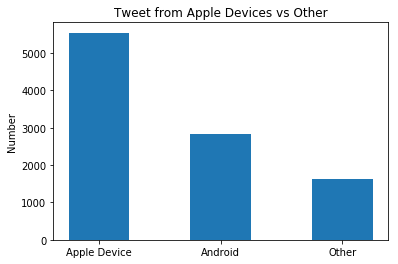

In [14]:
# Tweet from Apple Devices vs Other
tweets = load_json('problem1.json')
source_list = [0, 0, 0]

for tweet in tweets:
    if 'source' in tweet.keys():
        source_text = tweet['source'].lower()
        if 'mac' in source_text or 'iphone' in source_text or 'ios' in source_text or 'ipad' in source_text or 'twitterrific' in source_text:
            source_list[0] += 1
        elif 'android' in source_text:
            source_list[1] +=1
        else:
            source_list[2] += 1

print(source_list)
plt.bar(range(len(source_list)), source_list, align='center', width=0.5)
x_label = ['Apple Device', 'Android','Other']
plt.xticks(range(len(x_label)), x_label)
plt.ylabel("Number")
plt.title("Tweet from Apple Devices vs Other")
plt.show()


*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What data you collected? 
    * Why this topic is interesting or important to you? (Motivations)
    * How did you analyse the data?
    * What did you find in the data? 
 
     (please include figures or tables in the report, but no source code)

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 1 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **

# Grading Criteria:

** Totoal Points: 120 **


---------------------------------------------------------------------------
** Notebook:  **
    Points: 80


    -----------------------------------
    Qestion 1:
    Points: 20
    -----------------------------------
    
    (1) Select a topic that you are interested in.
    Points: 6 
    
    (2) Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million. Please check whether the total number of tweets collected is larger than 200?
    Points: 10 
    
    
    (3) Store the tweets you downloaded into a local file (txt file or json file)
    Points: 4 
    
    
    -----------------------------------
    Qestion 2:
    Points: 20
    -----------------------------------
    
    1. Word Count

    (1) Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets.
    Points: 4 

    (2) Plot a table of the top 30 words with their counts 
    Points: 4 
    
    2. Find the most popular tweets in your collection of tweets
    plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.
    Points: 4 
    
    3. Find the most popular Tweet Entities in your collection of tweets

    (1) plot a table of the top 10 hashtags, 
    Points: 4 

    (2) top 10 user mentions that are the most popular in your collection of tweets.
    Points: 4 
    
    
    -----------------------------------
    Qestion 3:
    Points: 20
    -----------------------------------
    
    (1) choose a popular twitter user who has many followers, such as "ladygaga".
    Points: 4 

    (2) Get the list of all friends and all followers of the twitter user.
    Points: 4 

    (3) Plot 20 out of the followers, plot their ID numbers and screen names in a table.
    Points: 4 

    (4) Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.
    Points: 4 
    
    (5) Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table
    Points: 4 
  
    -----------------------------------
    Qestion 4:  Business question
    Points: 20
    -----------------------------------
        Novelty: 10
        Interestingness: 10
    -----------------------------------
    Run some additional experiments with your data to gain familiarity with the twitter data ant twitter API.  Come up with a business question and describe how Twitter data can help you answer that question.




---------------------------------------------------------------------------
** Report: communicate the results**
    Points: 20

(1) What data you collected?
    Points: 5 

(2) Why this topic is interesting or important to you? (Motivations)
    Points: 5 

(3) How did you analyse the data?
    Points: 5 

(4) What did you find in the data?
(please include figures or tables in the report, but no source code)
    Points: 5 



---------------------------------------------------------------------------
** Slides (for 10 minutes of presentation): Story-telling **
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 

